# Assignment 3
### Due 9/21. Do four of five.
### Garret Knapp
### nbz3de

1. 
- Open the NHANES (or Ames prices or college completion datasets, if you prefer)
- Find two categorical variables of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis like we did with police use of force, but always be aware of how dirty the data are)
- Compute a contingency table for your categorical $X$ and $Y$
- Discuss any interesting patterns (or lack of one) that you observe

In [1]:
### Read in Dataset

import pandas as pd
import numpy as np

df = pd.read_csv('/home/garret/ds_5030/data/nhanes_data_17_18.csv')


/tmp/ipykernel_267804/3589502575.py:6: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/home/garret/ds_5030/data/nhanes_data_17_18.csv')


In [2]:
### Missing Values

df['GeneralHealthCondition_isNA'] = df['GeneralHealthCondition'].isna()
missing_var1 = df['GeneralHealthCondition_isNA'].value_counts()

df['TakeMedicationForDepression_isNA'] = df['TakeMedicationForDepression'].isna()
missing_var2= df['TakeMedicationForDepression_isNA'].value_counts()

print()
print()
print("Unique Values")
print(df['TakeMedicationForDepression'].unique())
print(df['GeneralHealthCondition'].unique())
print(f"Missing Values for Variable 1{missing_var1}\nMissing Values for Variable 2{missing_var2}")



Unique Values
[nan  0.  1.]
[nan 'Good' 'Very good' 'Fair or' 'Excellent' 'Poor?']
Missing Values for Variable 1GeneralHealthCondition_isNA
False    5964
True     2402
Name: count, dtype: int64
Missing Values for Variable 2TakeMedicationForDepression_isNA
False    5451
True     2915
Name: count, dtype: int64


In [3]:
### Contigency Table

pd.crosstab( df['GeneralHealthCondition'],df['TakeMedicationForDepression'],normalize='index')

TakeMedicationForDepression,0.0,1.0
GeneralHealthCondition,,
Excellent,0.960526,0.039474
Fair or,0.830741,0.169259
Good,0.909391,0.090609
Poor?,0.756098,0.243902
Very good,0.931562,0.068438


### Observations

This shows an interesting trend. While across all General Health Condition responses the majority of observations does not take depression medicine, it does appear that as health conditions decline, the percentage of people reporting depression medication use increases substantially. The data reveals that those reporting excellent health have only 3.9% taking depression medication, while this jumps dramatically to 24.4% for those reporting poor health, a massive increase. The percentages also increase gradually as health conditions transition from excellent through very good, good, and fair to poor, suggesting a relationship between declining physical health and mental health treatment needs.

2. 
- Open the NHANES dataset
- Find a categorical and numeric variable of interest (there are 198, and short descriptions are given in the `nhanes_meta_17_18.csv` file). Investigate their missing values (you don't have to focus on missing values for this analysis, but always be aware of them)
- Make descriptive tables and grouped kernel density plots to represent the variation in your numeric $Y$ conditional on your categorical $X$
- Discuss any interesting patterns (or lack of one) that you observe

In [4]:
### Opening NHANES dataset

nhanes_df = pd.read_csv('/home/garret/ds_5030/data/nhanes_data_17_18.csv')
nhanes_df

/tmp/ipykernel_267804/2655458418.py:3: DtypeWarning: Columns (142) have mixed types. Specify dtype option on import or set low_memory=False.
  nhanes_df = pd.read_csv('/home/garret/ds_5030/data/nhanes_data_17_18.csv')


,SEQN,GeneralHealthCondition,EverBreastfedOrFedBreastmilk,AgeStoppedBreastfeedingdays,AgeFirstFedFormuladays,AgeStoppedReceivingFormuladays,AgeStartedOtherFoodbeverage,AgeFirstFedMilkdays,TypeOfMilkFirstFedWholeMilk,TypeOfMilkFirstFed2Milk,...,DaysSmokedCigsDuringPast30Days,AvgCigarettesdayDuringPast30Days,TriedToQuitSmoking,TimesStoppedSmokingCigarettes,HowLongWereYouAbleToStopSmoking,UnitOfMeasureDayweekmonthyear_2_SMQ,CurrentSelfreportedHeightInches,CurrentSelfreportedWeightPounds,TriedToLoseWeightInPastYear,TimesLost10LbsOrMoreToLoseWeight
0,93703.0,NaN,1.0,273.0,1.0,365.0,152.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,93704.0,NaN,1.0,60.0,3.0,365.0,126.0,365.0,Whole or regular milk,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,93705.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,63.0,165.0,0.0,11 times or more
3,93706.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,68.0,145.0,0.0,Never
4,93707.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8361,102952.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,117.0,0.0,Never
8362,102953.0,Fair or,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,65.0,218.0,0.0,Never
8363,102954.0,Good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,66.0,150.0,0.0,Never
8364,102955.0,Very good,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
### Missing Values

nhanes_df['GeneralHealthCondition_isNA'] = nhanes_df['GeneralHealthCondition'].isna()
missing_var1 = nhanes_df['GeneralHealthCondition_isNA'].value_counts()

nhanes_df['GeneralHealthCondition'] = nhanes_df['GeneralHealthCondition'].fillna("unspecified")

nhanes_df['BodyMassIndexKgm2_isNA'] = nhanes_df['BodyMassIndexKgm2'].isna()
missing_var2= nhanes_df['BodyMassIndexKgm2_isNA'].value_counts()
print()
print(f"Missing Values for Variable 1{missing_var1}\n\nMissing Values for Variable 2{missing_var2}")
print()
print("Unique Values")
print(nhanes_df['BodyMassIndexKgm2'].unique())
print(nhanes_df['GeneralHealthCondition'].unique())


Missing Values for Variable 1GeneralHealthCondition_isNA
False    5964
True     2402
Name: count, dtype: int64

Missing Values for Variable 2BodyMassIndexKgm2_isNA
False    8005
True      361
Name: count, dtype: int64

Unique Values
[17.5 15.7 31.7 21.5 18.1 23.7 38.9 21.3 19.7 23.5 39.9 22.5 30.7 24.5
 22.  26.   nan 35.9 23.8 22.4 14.7 16.1 31.1 23.9 33.4 27.6 28.6 20.1
 35.1 17.9 18.5 33.7 16.6 30.6 17.3 33.9 21.2 14.6 24.8 22.1 25.2 25.5
 24.6 29.4 29.2 34.9 30.8 29.1 37.7 29.  27.1 21.9 31.9 25.7 15.1 14.
 24.1 25.9 22.2 27.4 16.4 33.5 25.4 24.  24.3 16.7 22.3 39.3 23.6 14.9
 36.9 18.9 31.2 32.  28.5 22.8 22.7 24.7 18.7 20.  28.4 41.6 28.  29.5
 43.2 27.8 28.3 27.9 21.1 19.4 30.5 32.2 25.3 27.  36.5 19.5 39.1 25.1
 30.1 32.8 21.  19.8 40.9 27.2 35.6 42.8 31.6 17.7 35.4 22.9 19.  21.4
 30.9 13.2 24.9 16.5 42.2 15.6 25.8 44.6 28.2 34.1 26.4 30.  27.5 28.7
 19.2 26.7 20.6 66.2 34.6 17.6 13.4 20.9 30.3 25.6 36.1 13.5 29.8 35.2
 31.3 32.6 28.8 34.  16.  23.2 21.7 37.8 40.2 23.1 14.4 4

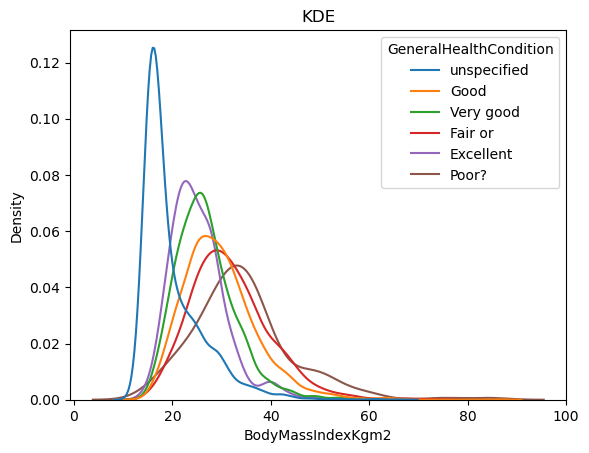

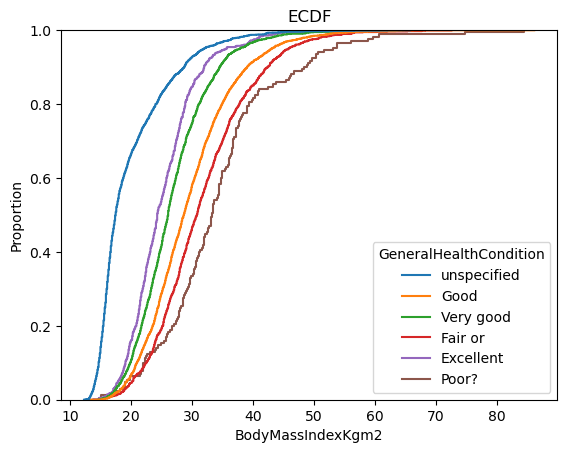

BodyMassIndexKgm2                                      \
                                   count       mean        std   min     25%   
GeneralHealthCondition                                                         
Excellent                          611.0  25.291489   5.706559  13.8  21.400   
Fair or                           1152.0  31.719358   8.030610  15.0  26.100   
Good                              2425.0  29.600948   7.480121  13.2  24.500   
Poor?                              170.0  34.252353  10.318606  14.9  28.275   
Very good                         1534.0  26.814342   6.154614  14.6  22.600   
unspecified                       2113.0  19.886749   6.234038  12.3  15.800   

                                          
                         50%   75%   max  
GeneralHealthCondition                    
Excellent               24.3  28.1  57.3  
Fair or                 30.8  36.1  72.6  
Good                    28.7  33.5  86.2  
Poor?                   33.3  37.7  84.4  
Very good               26.1  30.1  57.7  
unspecified             17.5  22.4  65.8

In [6]:
### Plots and Tables
import matplotlib.pyplot as plt
import seaborn as sns
conditioner = 'GeneralHealthCondition'

sns.kdeplot( data=nhanes_df, x='BodyMassIndexKgm2', hue=conditioner, common_norm=False ).set(title='KDE')
plt.show()
sns.ecdfplot( data=nhanes_df, x='BodyMassIndexKgm2', hue=conditioner).set(title='ECDF')
plt.show()
# create chart
nhanes_df.loc[:,['BodyMassIndexKgm2', conditioner]].groupby(conditioner).describe()

### Observations

The plots above reveal several compelling patterns. Most notably, the KDE, ECDF, and chart all demonstrate a consistent trend. Excluding those who listed "unspecified," as general health condition worsened, BMI values increased correspondingly. The chart supports this as the mean BMI increases between each level of general health condition. The KDE and ECDF clearly show that the BMI distributions shift progressively toward higher values as health conditions decline from excellent to poor. This suggests a plausible relationship between BMI and general health condition as perceived by a person.
<br><br>
Perhaps even more intriguing is that respondents who didn't specify their health condition exhibited the lowest BMI distribution of all groups. This counterintuitive finding could stem from several factors: participants may have misunderstood the survey questions, felt the health assessment was irrelevant to their situation, or were reluctant to report their current health status. For context, the unspecified value contains all GeneralHealthCondition NaN values to examine whether any major trends exist amongst this data subset, and there were few NaN values in the BMI responses.

3. 
We showed that the mean and median could be discovered by minimizing various kinds of loss functions; this is what machine learning is. To make a prediction $\hat{y}(z)$ of $Y$ when $X=z$, minimize the mean squared error:
$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$
Show that the solution to this problem is the LCLS/Naradaya-Watson estimator.

### Answer
In order to minimize the function the derivative is taken and then solved for ($\hat{y}(z)$) which results in the LCLS (See below for steps):



$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$

$$
w_i = \frac{1}{h}k\left(\frac{z-x_i}{h}\right)
$$

$$
MSE(\hat{y}(z)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(z) \right\rbrace^2 * w_i)
$$

$$
\frac{d}{d\hat y}\mathrm{MSE}(\hat y)
=\frac{1}{N}\sum_{i=1}^N w_i\cdot\bigl(2\bigr)\bigl(y_i-\hat y\bigr)
=2\frac{1}{N}\sum_{i=1}^N w_i\bigl(\hat y-y_i\bigr).
$$

$$
0=2\frac{1}{N}\sum_{i=1}^N w_i \hat y-w_iy_i
\;\Longrightarrow\;
\hat{y} \frac{1}{N} \sum_{i=1}^N w_i=\frac{1}{N}\sum_{i=1}^N w_i y_i.
$$

$$

\hat y(z)=\frac{\sum_{i=1}^N w_i y_i}{\sum_{i=1}^N w_i}
\;=\;
\frac{\sum_{i=1}^N \frac{1}{h}k\!\big(\tfrac{z-x_i}{h}\big)\,y_i}
{\sum_{i=1}^N \frac{1}{h}k\!\big(\tfrac{z-x_i}{h}\big)}

$$

$$
\frac{\frac{1}{h}\sum_{i=1}^N k\!\big(\tfrac{z-x_i}{h}\big)\,y_i}
{\frac{1}{h}\sum_{i=1}^N k\!\big(\tfrac{z-x_i}{h}\big)}
\;=\;
\frac{\sum_{i=1}^N k\!\big(\tfrac{z-x_i}{h}\big)\,y_i}
{\sum_{i=1}^N k\!\big(\tfrac{z-x_i}{h}\big)}
$$

Step 1 subsitution <br>
Step 2 rewrite <br>
Step 3 differentiate <br>
Step 4 Set derivative equal to 0 <br>
step 5 solve for $\hat{y}$ <br>
step 6 plug back in subsitution
step 7 simplify the equation (cancel out terms)


In this case the $\frac{1}{n}$ and $\frac{1}{h}$ cancel out during the derivation, but this shows that the solution to the MSE is the LCLS equation.


4. 
- Write a class or set of functions that implement the LCLS/Naradaya-Watson estimator, using the Silverman plug-in estimate for the conditioning variable $X$ as the bandwidth.
- From one of the course data sets, find two numeric variables of interest, analyze their relationship with the the LCLS/Naradaya-Watson estimator, and discuss your results.

In [7]:
# computes bandwidth with silverman plug-in estimate
def bandwidth(x):
    iqr = np.quantile(x,.75) - np.quantile(x,.25)
    h = 0.9 * min(np.std(x), iqr/1.34) * len(x) **(-0.2)
    print(f'Computed bandwidth is: {h}')
    return h

# computes gaussian kernel
def kernel(h,I):
    print(I)
    K = np.exp(-I/(2*h**2) )/np.sqrt(2*np.pi*h**2 )
    return K

# compute LCLS Estimator
def lcls_equation(y, K):
    numerator = y@K # Compute the numerator
    denominator = np.sum(K,axis=0) # Compute denominator
    y_hat = numerator/denominator # Compute estimator
    return y_hat

# compute lcls
def lcls(x,y, h = None):

    grid = np.sort(x.unique()) # Extract and sort unique values for x
    
    if h is None:
        h_val = bandwidth(x)
    
    # calculate the kernel
    I = (x.to_numpy().reshape(-1,1)-grid.reshape(1,-1) )**2
    K = kernel(h_val,I)

    # Compute LCLS estimator
    y_hat = lcls_equation(y, K)

    return y_hat, grid

Computed bandwidth is: 1.520699946702658
[[ 112.36  110.25  104.04 ...  992.25 1004.89 1115.56]
 [  47.61   46.24   42.25 ... 1239.04 1253.16 1376.41]
 [ 114.49  112.36  106.09 ...  985.96  998.56 1108.89]
 ...
 [  11.56   10.89    9.   ... 1497.69 1513.21 1648.36]
 [ 542.89  538.24  524.41 ...  353.44  361.    428.49]
 [1204.09 1197.16 1176.49 ...   54.76   57.76   86.49]]


<Axes: xlabel='TotalPercentFat', ylabel='BodyMassIndexKgm2'>

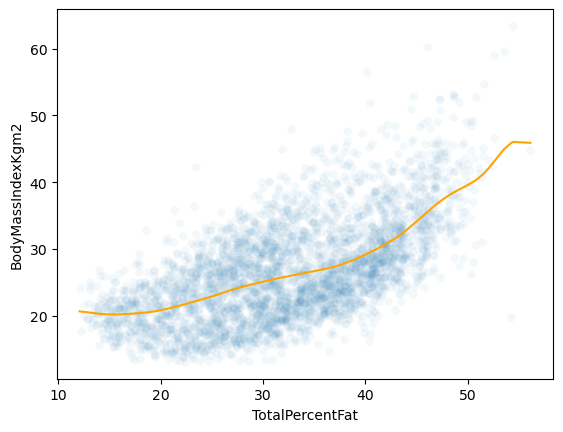

In [8]:

columns = ['TotalPercentFat', 'BodyMassIndexKgm2']
nhanes_df = nhanes_df.loc[:,columns] 
nhanes_df = nhanes_df.dropna()
nhanes_df = nhanes_df.reset_index()

x = nhanes_df['TotalPercentFat'].astype(float) 
y = nhanes_df['BodyMassIndexKgm2'].astype(float) 
 
y_hat,grid = lcls(x,y)
# visualize the function
sns.scatterplot(data=nhanes_df, y='BodyMassIndexKgm2', x='TotalPercentFat',alpha=.05)
sns.lineplot(x=grid,y=y_hat, color='orange')

The LCLS smoothing estimates the conditional expectation E[BodyMassIndexKgm2 | TotalPercentFat], showing an increasing nonlinear relationship between body fat percentage and BMI. The estimator exhibits good fit, traversing smoothly through the bulk of the data without overfitting or extreme fluctuations. This indicates a suitable value for h was calculated.
The curve loses precision after 50% TotalPercentFat due to sparse data in that region. The nonlinear fit reveals that the BMI-body fat association varies across the range, with steeper increases in the middle portion of the distribution. 

5. 
- In any of the available data sets, investigate the relationships between pairs of variables $(X,Y)$ with a scatterplot and CEF (for example, price on area)
- Is this relationship plausibly causal, or are there missing variables that might explain at least part of the relationship between your variables? These can be "conceptual" rather than "practical"; for example, 'talent' or 'grit' probably explain education outcomes, but are almost impossible to measure. We are asking whether there are hypothetical **threats to causal identification** of the effect of $X$ on $Y$.
- Explain how, regardless of the threat to causal identification, you can still use your model to predict $Y$ given $X$, as long as you don't intervene in the system to control the outcome